# 03. Линейная регрессия

В этом блокноте мы разберём:
- постановку задачи линейной регрессии;
- математическую модель (гипотеза, функция потерь);
- обучение методом наименьших квадратов;
- реализацию в `scikit-learn` и интерпретацию коэффициентов;
- практические задания.

## 1. Постановка задачи

Пусть есть объекты, каждый описывается вектором признаков $x = (x_1, \dots, x_d)$, и числовая целевая переменная $y \in \mathbb{R}$.

**Задача регрессии**: по обучающей выборке

$$
(x^{(1)}, y^{(1)}), \dots, (x^{(n)}, y^{(n)})
$$

построить функцию $\hat{y} = f(x)$, которая хорошо предсказывает значение $y$ для новых объектов.

В линейной регрессии предполагается, что зависимость **линейна по признакам**:

$$
\hat{y} = w_0 + w_1 x_1 + \dots + w_d x_d = w_0 + w^T x.
$$

Задача обучения — подобрать коэффициенты $w_0, w_1, \dots, w_d$. 

## 2. Функция потерь и метод наименьших квадратов

Чтобы подобрать коэффициенты, нужно формализовать, **что значит "хорошо предсказывать"**.

Часто используют **среднеквадратичную ошибку (MSE)**:

$$
L(w) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - (w_0 + w^T x^{(i)}))^2.
$$

Метод наименьших квадратов (МНК) ищет такие $w$, которые **минимизируют** эту ошибку.

В матричной форме (без подробного вывода):

$$
w = (X^T X)^{-1} X^T y,
$$

где:
- $X$ — матрица объектов (строка — объект, столбец — признак, плюс столбец единиц для $w_0$),
- $y$ — вектор ответов.

На практике мы редко считаем это вручную — за нас это делает `scikit-learn`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use("seaborn-v0_8-whitegrid")

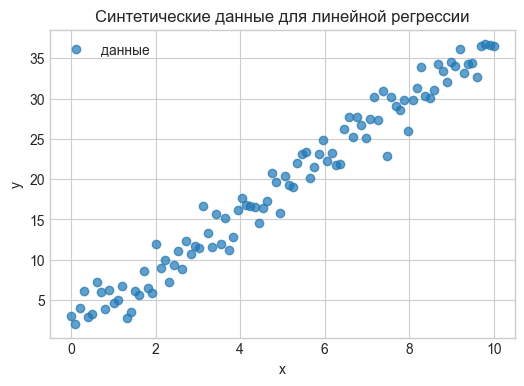

In [2]:
# Сгенерируем синтетические данные для простой линейной регрессии

np.random.seed(42)

n_samples = 100
X = np.linspace(0, 10, n_samples)
true_w0 = 2.0
true_w1 = 3.5
noise = np.random.normal(loc=0.0, scale=2.0, size=n_samples)

y = true_w0 + true_w1 * X + noise

X = X.reshape(-1, 1)  # превращаем в матрицу признаков (n, 1)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.7, label="данные")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Синтетические данные для линейной регрессии")
plt.legend()
plt.show()

Оценённый w0 (intercept_): 1.6543742918452473
Оценённый w1 (coef_): 3.5275865346733126
MSE на обучающей выборке: 3.259618853992314


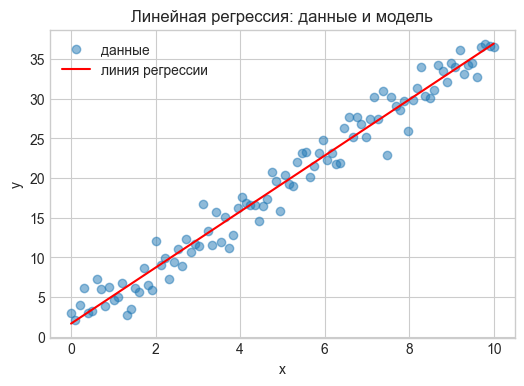

In [3]:
# Обучим модель линейной регрессии из scikit-learn

model = LinearRegression()
model.fit(X, y)

print("Оценённый w0 (intercept_):", model.intercept_)
print("Оценённый w1 (coef_):", model.coef_[0])

# Сделаем предсказания
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("MSE на обучающей выборке:", mse)

# Визуализируем прямую регрессии
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.5, label="данные")
plt.plot(X, y_pred, color="red", label="линия регрессии")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Линейная регрессия: данные и модель")
plt.show()

## 3. Интерпретация коэффициентов

В модели $\hat{y} = w_0 + w_1 x$:
- $w_0$ — **свободный член** (пересечение с осью $y$),
- $w_1$ — **наклон**: насколько в среднем изменится $y$ при увеличении $x$ на единицу.

Если признаки предварительно нормировать/масштабировать, то сравнивать коэффициенты разных признаков становится проще.

Важно: **большой по модулю коэффициент не всегда означает "важный признак"** — нужно учитывать масштабы признаков и мультиколлинеарность.

## 4. Практика: регрессия с несколькими признаками

Создадим синтетический датасет с двумя признаками и обучим линейную модель. Обратите внимание на форму матрицы $X$ и вектора коэффициентов.

In [4]:
# Синтетические данные с двумя признаками
np.random.seed(0)

n_samples = 200
x1 = np.random.uniform(0, 10, size=n_samples)
x2 = np.random.uniform(0, 5, size=n_samples)

true_w0 = 1.0
true_w1 = 2.0
true_w2 = -1.5
noise = np.random.normal(0, 1.0, size=n_samples)

y = true_w0 + true_w1 * x1 + true_w2 * x2 + noise

X_multi = np.column_stack([x1, x2])

model_multi = LinearRegression()
model_multi.fit(X_multi, y)

print("Оценённый w0:", model_multi.intercept_)
print("Оценённые w1, w2:", model_multi.coef_)

# Посчитаем MSE
pred_multi = model_multi.predict(X_multi)
print("MSE:", mean_squared_error(y, pred_multi))

Оценённый w0: 0.756954357851015
Оценённые w1, w2: [ 2.02559393 -1.49580565]
MSE: 0.9619504990312067


## 5. Задания

**Теория**

1. Запишите формулу линейной регрессии для случая трёх признаков.
2. Объясните, зачем нужна функция потерь и что означает минимизация MSE.
3. Как вы думаете, какие проблемы могут возникать, если признаков очень много и они сильно скоррелированы между собой?

**Практика**

1. Измените уровень шума в синтетических данных (параметр `scale` в `np.random.normal`). Как это влияет на MSE и на вид прямой регрессии?
2. Добавьте третий признак (например, квадрат одного из существующих признаков) и обучите модель заново. Изменилось ли качество?
3. Попробуйте сгенерировать данные, для которых зависимость между $x$ и $y$ явно **нелинейна** (например, $y = x^2 + \text{noise}$). Обучите линейную регрессию и прокомментируйте результат.

В следующем ноутбуке мы перейдём к задаче **классификации** и познакомимся с логистической регрессией и метриками качества моделей.

### Решения: теория

1. **Формула для трёх признаков:** $\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$.

2. **Функция потерь** задаёт, насколько предсказания отличаются от истинных ответов. Минимизация MSE означает подбор таких коэффициентов $w$, при которых средний квадрат ошибки предсказания минимален; при нормальном шуме МНК даёт несмещённые оценки.

3. При **много признаков и сильной корреляции** (мультиколлинеарность): матрица $X^T X$ становится плохо обусловленной, оценки коэффициентов неустойчивы, интерпретация затруднена. Помогают регуляризация (Ridge, Lasso) и отбор признаков.

scale=0.5: MSE=0.20
scale=2.0: MSE=3.60
scale=5.0: MSE=28.86
MSE с признаком x1^2: 1.1056169183071227


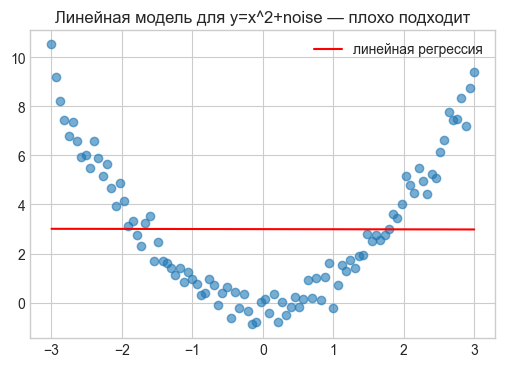

In [5]:
# Решения: практика
# 1. Влияние шума: при большом scale MSE растёт, прямая регрессии менее точно отражает зависимость
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
for scale in [0.5, 2.0, 5.0]:
    y = 2.0 + 3.5 * X[:, 0] + np.random.normal(0, scale, 100)
    m = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, m.predict(X))
    print(f"scale={scale}: MSE={mse:.2f}")

# 2. Третий признак (квадрат x1): если зависимость нелинейна по x1, качество может улучшиться
x1, x2 = X[:, 0], np.random.uniform(0, 5, 100)
X3 = np.column_stack([x1, x2, x1**2])
y3 = 1.0 + 2.0*x1 - 1.5*x2 + 0.1*x1**2 + np.random.normal(0, 1, 100)
m3 = LinearRegression().fit(X3, y3)
print("MSE с признаком x1^2:", mean_squared_error(y3, m3.predict(X3)))

# 3. Нелинейная зависимость y = x^2 + noise: линейная модель даёт плохое приближение
X_nl = np.linspace(-3, 3, 100).reshape(-1, 1)
y_nl = X_nl[:, 0]**2 + np.random.normal(0, 0.5, 100)
m_nl = LinearRegression().fit(X_nl, y_nl)
plt.figure(figsize=(6, 4))
plt.scatter(X_nl, y_nl, alpha=0.6)
plt.plot(X_nl, m_nl.predict(X_nl), 'r-', label='линейная регрессия')
plt.legend()
plt.title("Линейная модель для y=x^2+noise — плохо подходит")
plt.show()